In [1]:
from fastai.vision.all import *

/Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <CFED5F8E-EC3F-36FD-AAA3-2C6C7F8D3DD9> /Users/smorrin/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /Users/smorrin/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
path = untar_data(URLs.CAMVID_TINY)

In [3]:
path.ls()

(#3) [Path('/Users/smorrin/.fastai/data/camvid_tiny/images'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels'),Path('/Users/smorrin/.fastai/data/camvid_tiny/codes.txt')]

In [4]:
masks = path / "labels"

In [5]:
masks.ls()

(#100) [Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/Seq05VD_f02070_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0001TP_009000_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/Seq05VD_f02640_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/Seq05VD_f03150_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0006R0_f03630_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0006R0_f02550_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0006R0_f03240_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0001TP_009360_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/Seq05VD_f01320_P.png'),Path('/Users/smorrin/.fastai/data/camvid_tiny/labels/0016E5_08400_P.png')...]

In [6]:
label_fname = masks.ls()[0]

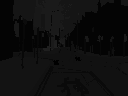

In [9]:
img = PILImage.create(label_fname); img

In [10]:
from torchvision.transforms.functional import pil_to_tensor

In [11]:
pil_to_tensor(img)

tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]],

        [[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]],

        [[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]]], dtype=torch.uint8)

In [12]:
path = Path.cwd()  / "archive" / "train"; path

Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train')

In [14]:
mask_path = path / "949235_mask.png"; mask_path

Path('/Users/smorrin/Coding/AI/DeforestationTUMAI/archive/train/949235_mask.png')

In [15]:
mask_img = PILImage.create(mask_path)

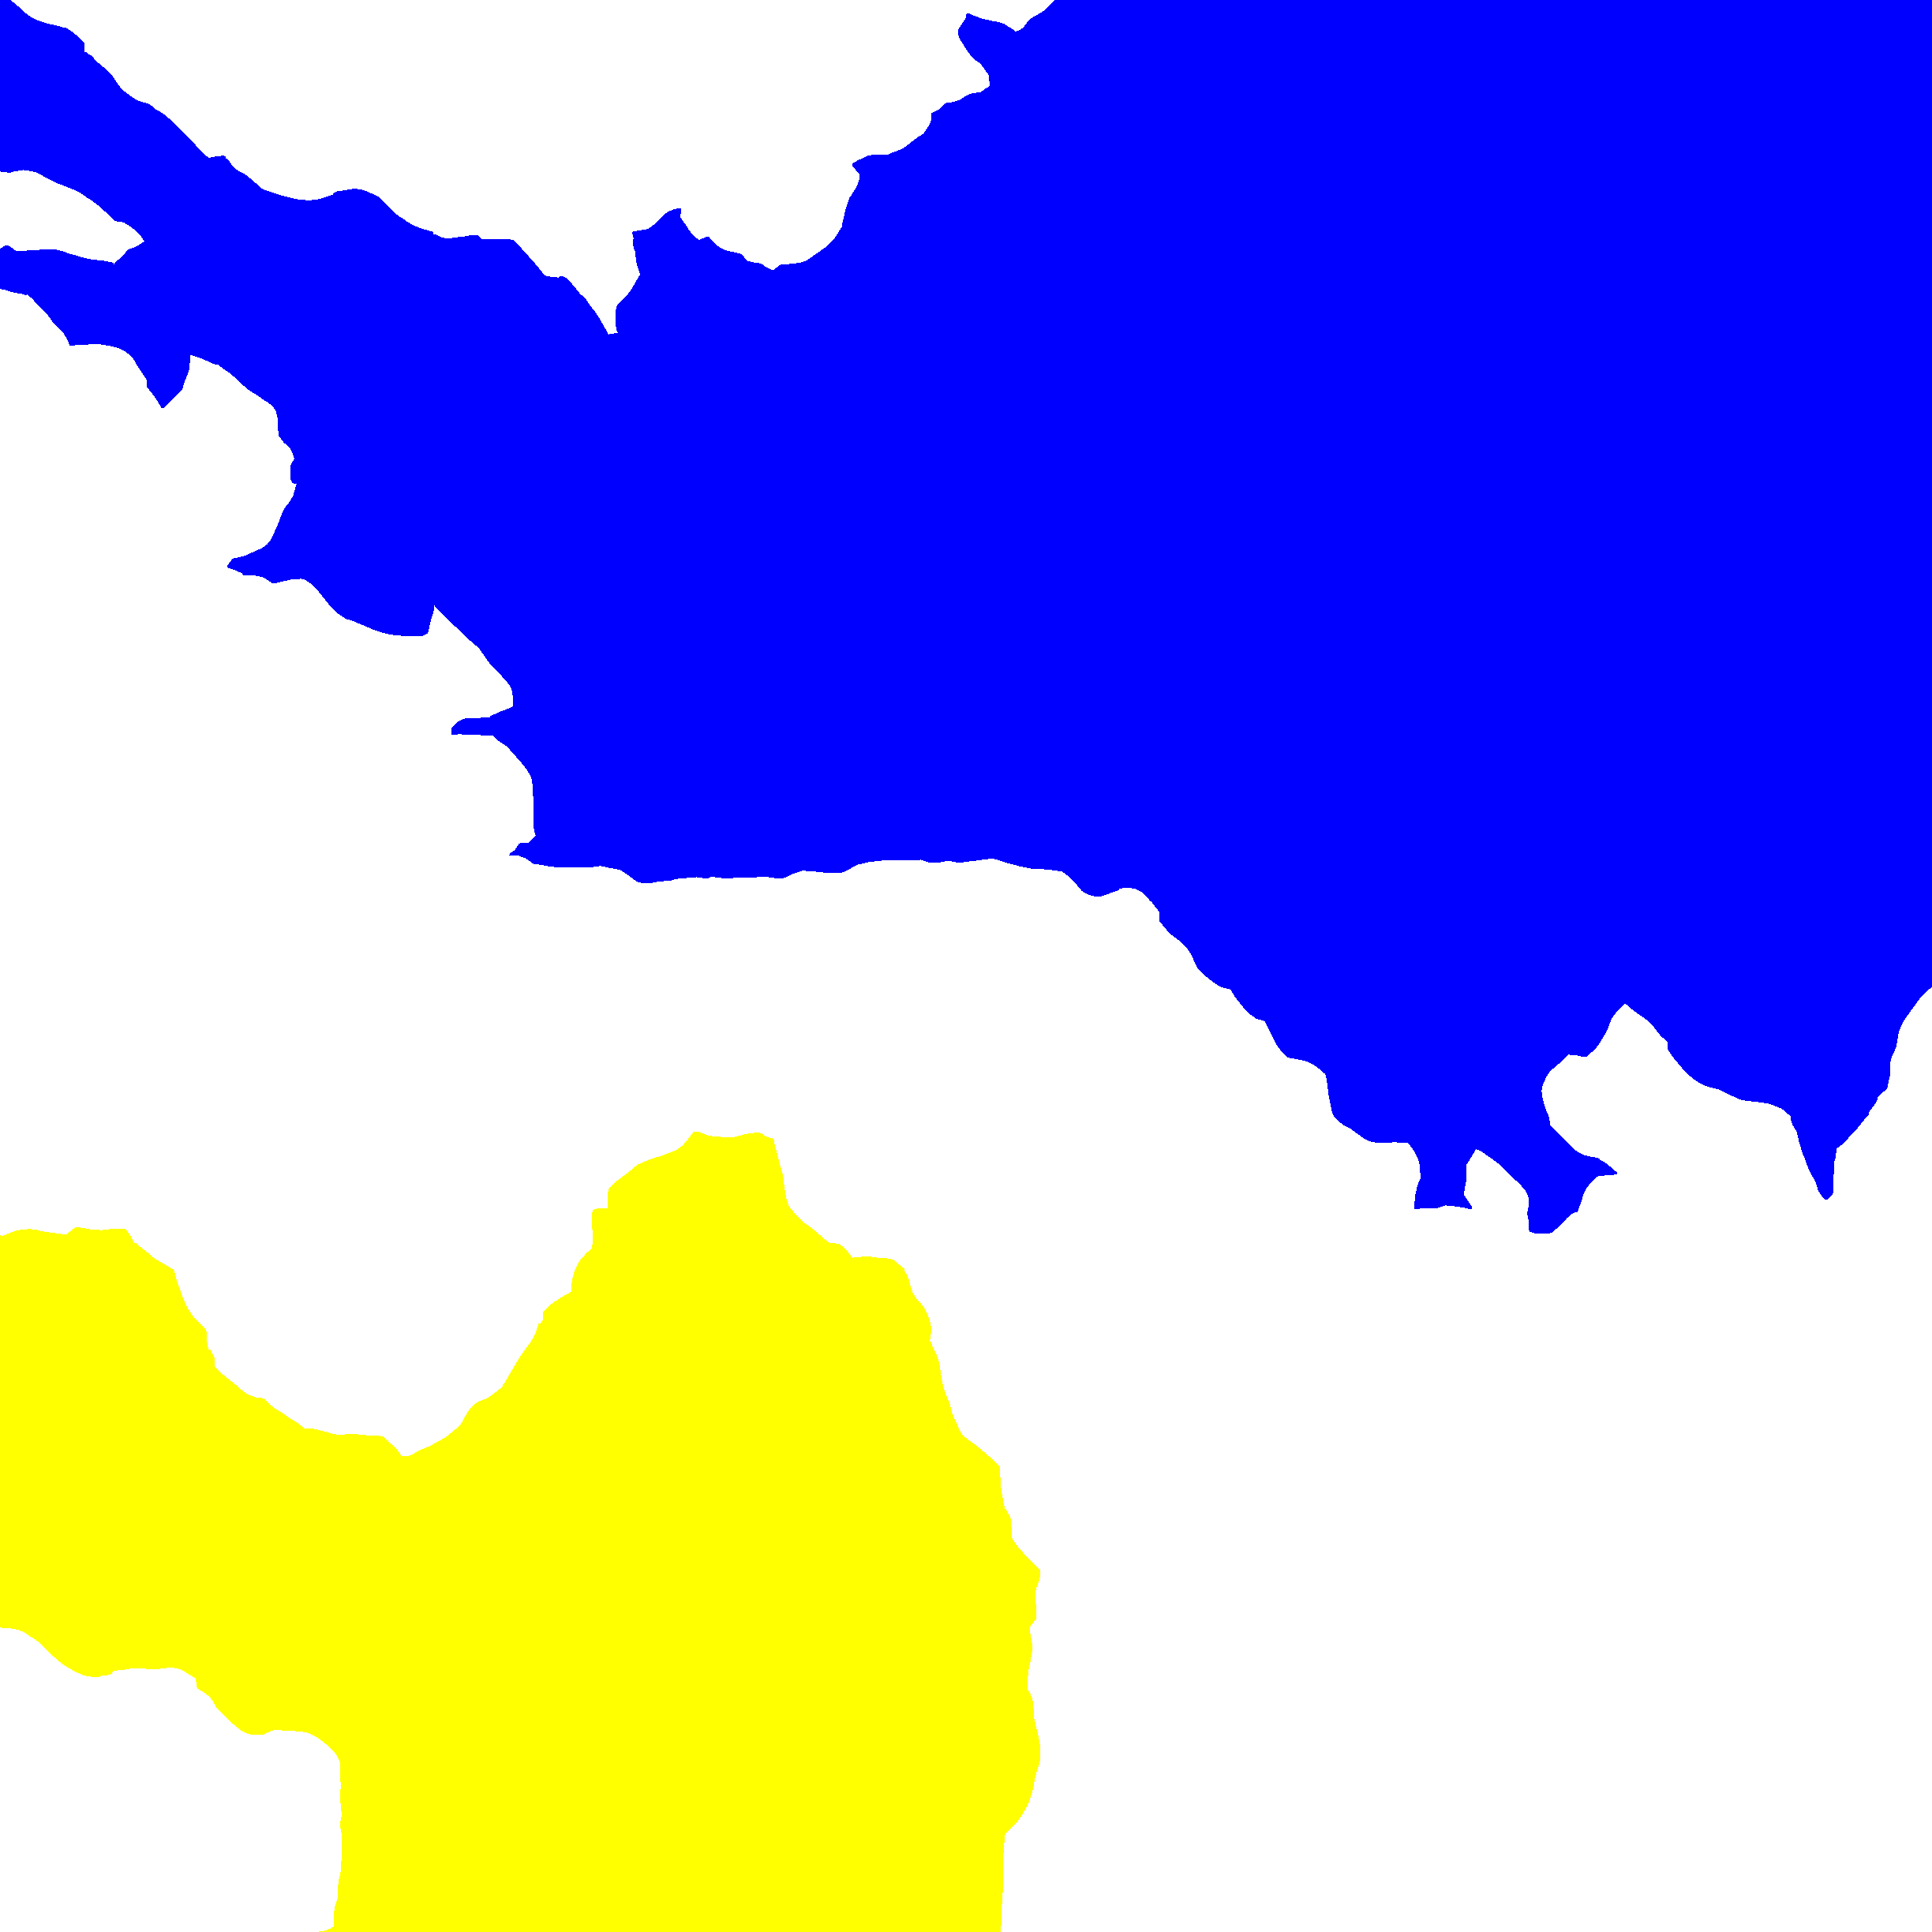

In [16]:
mask_img

In [26]:
img_tens = pil_to_tensor(mask_img)

In [27]:
img_tens.shape

torch.Size([3, 2448, 2448])

In [29]:
img_tens.reshape(-1, 2448, 3); img_tens

tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)

In [32]:
from skimage.io import imread

In [33]:
imread(mask_img)

OSError: Cannot understand given URI: PILImage mode=RGB size=2448x2448.